--------------------------------------------------------------------------------------------------

**1. Problem 1A: Single-Year HDI Exploration**


-------------------------------------------------------------------------------------

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


try:
    df = pd.read_csv("/content/drive/MyDrive/Dataset/Human_Development_Index_Dataset.csv")
except UnicodeDecodeError:
    df = pd.read_csv("/content/drive/MyDrive/Dataset/Human_Development_Index_Dataset.csv", encoding="latin1")



In [73]:
df.isnull().sum()

,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,627
life_expectancy,0
pop_millions,0
hdi_f,1784
hdi_m,1784
life_expec_f,0


In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
#df.head()


1. Extract Latest Year:
• Identify unique years in the dataset.
• Filter the dataset to include only observations from the year 2022.
• Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).

• Display the first 10 rows of the 2022 dataset




In [75]:
#Identifying unique years in the dataset.
df['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [76]:
#Filtering the dataset to include only observations from the year 2022.
#Saving the filtered dataframe as hdi 2022 df

hdi_2022_df=df[df["year"]==2022].copy()
hdi_2022_df.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [77]:
#Display the first 10 rows of the 2022 dataset.
df.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948
5,6,AFG,Afghanistan,1995,0.318,52.544,16.418912,NaN,NaN,54.087,...,NaN,NaN,1.676049,9.093722,NaN,NaN,NaN,NaN,0.086321,2.1968
6,7,AFG,Afghanistan,1996,0.326,53.243,17.106596,NaN,NaN,54.806,...,NaN,NaN,1.773336,9.246831,NaN,NaN,NaN,NaN,0.080092,2.0402
7,8,AFG,Afghanistan,1997,0.330,53.634,17.788819,NaN,NaN,55.151,...,NaN,NaN,1.870624,9.399939,NaN,NaN,NaN,NaN,0.073316,2.1297
8,9,AFG,Afghanistan,1998,0.329,52.943,18.493132,NaN,NaN,54.818,...,NaN,NaN,1.967912,9.553048,NaN,NaN,NaN,NaN,0.069134,2.2010
9,10,AFG,Afghanistan,1999,0.337,54.846,19.262847,NaN,NaN,56.300,...,NaN,NaN,2.065200,9.706157,NaN,NaN,NaN,NaN,0.056669,2.0832


Count the number of rows and columns.

In [78]:
#Count the number of rows and columns.

rows, columns = hdi_2022_df.shape
print("Rows:", rows)
print("Columns:", columns)


Rows: 206
Columns: 30


• List all column names and their data types.


In [79]:
#List all column names and their data types.
hdi_2022_df.dtypes


,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [80]:
# Check for missing values in each column and report total counts.
hdi_2022_df.isna().sum()


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


In [81]:
hdi_2022_df.select_dtypes(include='object').head()


,iso3,country
32,AFG,Afghanistan
65,ALB,Albania
98,DZA,Algeria
131,AND,Andorra
164,AGO,Angola


In [82]:
#inconsistent or misspelled country names
uc=hdi_2022_df['country'].nunique()
allCountry= hdi_2022_df['country'].shape[0]
if (uc==allCountry):
  print("All countries are unique")
else:
  print("Not all countries are unique in the dataset")

All countries are unique


In [83]:
# Checking whether there is duplicate rows.
duplicateRow=hdi_2022_df.duplicated().sum()
print(f"there are {duplicateRow} duplidate rows")

there are 0 duplidate rows


In [84]:
"""handle missing values with median.
because median is robost choice for
the data where outlier is present.
"""

numeric_cols = hdi_2022_df.select_dtypes(include='number').columns

for col in numeric_cols:
    hdi_2022_df.loc[:, col] = hdi_2022_df[col].fillna(hdi_2022_df[col].median())


In [85]:
#verifying after filling missing values
hdi_2022_df.isnull().sum()

,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,0
life_expectancy,0
pop_millions,0
hdi_f,0
hdi_m,0
life_expec_f,0


The mean, median, and standard deviation of HDI for the year 2022.


In [86]:
#Compute the mean, median, and standard deviation of HDI for the year 2022.

# Mean
mean_hdi_2022 = hdi_2022_df['hdi'].mean()

# Median
median_hdi_2022 = hdi_2022_df['hdi'].median()

# Standard Deviation
hdi_std = hdi_2022_df['hdi'].std()

print(f"Mean HDI: {mean_hdi_2022:.3f}")
print(f"Median HDI: {median_hdi_2022:.3f}")
print(f"Standard Deviation of HDI: {hdi_std:.3f}")


Mean HDI: 0.723
Median HDI: 0.740
Standard Deviation of HDI: 0.152


• Identify the country with the highest HDI in 2022.
• Identify the country with the lowest HDI in 2022.

In [87]:
# Find index of maximum HDI
greater_hdi_idx = hdi_2022_df['hdi'].idxmax()

# Get country name and HDI
max_hdi_country = hdi_2022_df.loc[greater_hdi_idx, 'country']
max_hdi_value = hdi_2022_df.loc[greater_hdi_idx, 'hdi']

print(f"Country with highest HDI: {max_hdi_country} ({max_hdi_value})")


Country with highest HDI: Switzerland (0.967)


In [88]:
# Find index of minimum HDI
low_hdi_idx = hdi_2022_df['hdi'].idxmin()

# Get country name and HDI
min_hdi_country = hdi_2022_df.loc[low_hdi_idx, 'country']
min_hdi_value = hdi_2022_df.loc[low_hdi_idx, 'hdi']

print(f"Country with lowest HDI: {min_hdi_country} ({min_hdi_value})")


Country with lowest HDI: Somalia (0.38)


In [89]:
# Filtering countries with HDI greater than  0.800
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800].copy()

# Sort by GNI per Capita decending
high_hdi_sorted = high_hdi_df.sort_values(by='gross_inc_percap', ascending=False)

# Display top 10 countries
high_hdi_sorted.head(10)



,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,0.360,66.521111,69.519997,28.000000,72.000000,52.79,67.26,3.736776,9.9662
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,0.360,77.866913,84.067802,25.308426,74.691574,52.91,64.71,4.373242,9.9662


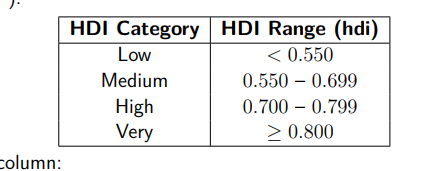

In [90]:
#6 Define a function to categorize HDI

def categorize_hdi(hdi):
    if hdi < 0.550:
        return 'Low'
    elif 0.550 <= hdi < 0.700:
        return 'Medium'
    elif 0.700 <= hdi < 0.800:
        return 'High'
    else:
        return 'Very High'

# Apply the function using .loc to create a new column
hdi_2022_df.loc[:, 'HDI_Category'] = hdi_2022_df['hdi'].apply(categorize_hdi)

# Verify the categories
print(hdi_2022_df.loc[:, ['country', 'hdi', 'HDI_Category']].head(10))



                 country    hdi HDI_Category
32           Afghanistan  0.462          Low
65               Albania  0.789         High
98               Algeria  0.745         High
131              Andorra  0.884    Very High
164               Angola  0.591       Medium
197  Antigua and Barbuda  0.826    Very High
230            Argentina  0.849    Very High
263              Armenia  0.786         High
296            Australia  0.946    Very High
329              Austria  0.926    Very High


In [91]:
#Saving the final dataframe as HDI category added.csv
filename = '2548382_Ritesh_Khatri_HDI_category_added.csv'

try:
    # Try to open the file for reading
    with open(filename, 'r'):
        print(f"{filename} already exists. Skipping save.")
except FileNotFoundError:
    # If file does not exist, save it
    try:
        hdi_2022_df.to_csv(filename, index=False)
        print(f"{filename} saved successfully.")
    except Exception as e:
        print(f"Error saving {filename}: {e}")


2548382_Ritesh_Khatri_HDI_category_added.csv saved successfully.


-------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

**2. Problem 1B: HDI Trend Analysis**

** HDI Visualization and Trend Analysis (2020 – 2022)**

---------------------------------------------------------------------------------------------------------------

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for years 2020, 2021, 2022
hdi_2020_2022_df = df[df['year'].isin([2020, 2021, 2022])].copy()
import pandas as pd

# df_1B = pd.read_csv("your_file.csv")

# Country → Region mapping costume.............................
country_region_map = {
    'Afghanistan': 'South Asia',
    'Albania': 'Europe and Central Asia',
    'Algeria': 'Arab States',
    'Andorra': 'Europe and Central Asia',
    'Angola': 'Sub-Saharan Africa',
    'Antigua and Barbuda': 'Latin America and the Caribbean',
    'Argentina': 'Latin America and the Caribbean',
    'Armenia': 'Europe and Central Asia',
    'Australia': 'East Asia and the Pacific',
    'Austria': 'Europe and Central Asia',
    'Azerbaijan': 'Europe and Central Asia',
    'Bahamas': 'Latin America and the Caribbean',
    'Bahrain': 'Arab States',
    'Bangladesh': 'South Asia',
    'Barbados': 'Latin America and the Caribbean',
    'Belarus': 'Europe and Central Asia',
    'Belgium': 'Europe and Central Asia',
    'Belize': 'Latin America and the Caribbean',
    'Benin': 'Sub-Saharan Africa',
    'Bhutan': 'South Asia',
    'Bolivia (Plurinational State of)': 'Latin America and the Caribbean',
    'Bosnia and Herzegovina': 'Europe and Central Asia',
    'Botswana': 'Sub-Saharan Africa',
    'Brazil': 'Latin America and the Caribbean',
    'Brunei Darussalam': 'East Asia and the Pacific',
    'Bulgaria': 'Europe and Central Asia',
    'Burkina Faso': 'Sub-Saharan Africa',
    'Burundi': 'Sub-Saharan Africa',
    'Cabo Verde': 'Sub-Saharan Africa',
    'Cambodia': 'East Asia and the Pacific',
    'Cameroon': 'Sub-Saharan Africa',
    'Canada': 'Latin America and the Caribbean',
    'Central African Republic': 'Sub-Saharan Africa',
    'Chad': 'Sub-Saharan Africa',
    'Chile': 'Latin America and the Caribbean',
    'China': 'East Asia and the Pacific',
    'Colombia': 'Latin America and the Caribbean',
    'Comoros': 'Sub-Saharan Africa',
    'Congo': 'Sub-Saharan Africa',
    'Congo (Democratic Republic of the)': 'Sub-Saharan Africa',
    'Costa Rica': 'Latin America and the Caribbean',
    "Côte d'Ivoire": 'Sub-Saharan Africa',
    'Croatia': 'Europe and Central Asia',
    'Cuba': 'Latin America and the Caribbean',
    'Cyprus': 'Europe and Central Asia',
    'Czechia': 'Europe and Central Asia',
    'Denmark': 'Europe and Central Asia',
    'Djibouti': 'Arab States',
    'Dominica': 'Latin America and the Caribbean',
    'Dominican Republic': 'Latin America and the Caribbean',
    'Ecuador': 'Latin America and the Caribbean',
    'Egypt': 'Arab States',
    'El Salvador': 'Latin America and the Caribbean',
    'Equatorial Guinea': 'Sub-Saharan Africa',
    'Eritrea': 'Sub-Saharan Africa',
    'Estonia': 'Europe and Central Asia',
    'Eswatini (Kingdom of)': 'Sub-Saharan Africa',
    'Ethiopia': 'Sub-Saharan Africa',
    'Fiji': 'East Asia and the Pacific',
    'Finland': 'Europe and Central Asia',
    'France': 'Europe and Central Asia',
    'Gabon': 'Sub-Saharan Africa',
    'Gambia': 'Sub-Saharan Africa',
    'Georgia': 'Europe and Central Asia',
    'Germany': 'Europe and Central Asia',
    'Ghana': 'Sub-Saharan Africa',
    'Greece': 'Europe and Central Asia',
    'Grenada': 'Latin America and the Caribbean',
    'Guatemala': 'Latin America and the Caribbean',
    'Guinea': 'Sub-Saharan Africa',
    'Guinea-Bissau': 'Sub-Saharan Africa',
    'Guyana': 'Latin America and the Caribbean',
    'Haiti': 'Latin America and the Caribbean',
    'Honduras': 'Latin America and the Caribbean',
    'Hong Kong, China (SAR)': 'East Asia and the Pacific',
    'Hungary': 'Europe and Central Asia',
    'Iceland': 'Europe and Central Asia',
    'India': 'South Asia',
    'Indonesia': 'East Asia and the Pacific',
    'Iran (Islamic Republic of)': 'Arab States',
    'Iraq': 'Arab States',
    'Ireland': 'Europe and Central Asia',
    'Israel': 'Arab States',
    'Italy': 'Europe and Central Asia',
    'Jamaica': 'Latin America and the Caribbean',
    'Japan': 'East Asia and the Pacific',
    'Jordan': 'Arab States',
    'Kazakhstan': 'Europe and Central Asia',
    'Kenya': 'Sub-Saharan Africa',
    'Kiribati': 'East Asia and the Pacific',
    "Korea (Democratic People's Rep. of)": 'East Asia and the Pacific',
    'Korea (Republic of)': 'East Asia and the Pacific',
    'Kuwait': 'Arab States',
    'Kyrgyzstan': 'Europe and Central Asia',
    "Lao People's Democratic Republic": 'East Asia and the Pacific',
    'Latvia': 'Europe and Central Asia',
    'Lebanon': 'Arab States',
    'Lesotho': 'Sub-Saharan Africa',
    'Liberia': 'Sub-Saharan Africa',
    'Libya': 'Arab States',
    'Liechtenstein': 'Europe and Central Asia',
    'Lithuania': 'Europe and Central Asia',
    'Luxembourg': 'Europe and Central Asia',
    'Madagascar': 'Sub-Saharan Africa',
    'Malawi': 'Sub-Saharan Africa',
    'Malaysia': 'East Asia and the Pacific',
    'Maldives': 'South Asia',
    'Mali': 'Sub-Saharan Africa',
    'Malta': 'Europe and Central Asia',
    'Marshall Islands': 'East Asia and the Pacific',
    'Mauritania': 'Arab States',
    'Mauritius': 'Sub-Saharan Africa',
    'Mexico': 'Latin America and the Caribbean',
    'Micronesia (Federated States of)': 'East Asia and the Pacific',
    'Moldova (Republic of)': 'Europe and Central Asia',
    'Monaco': 'Europe and Central Asia',
    'Mongolia': 'East Asia and the Pacific',
    'Montenegro': 'Europe and Central Asia',
    'Morocco': 'Arab States',
    'Mozambique': 'Sub-Saharan Africa',
    'Myanmar': 'East Asia and the Pacific',
    'Namibia': 'Sub-Saharan Africa',
    'Nauru': 'East Asia and the Pacific',
    'Nepal': 'South Asia',
    'Netherlands': 'Europe and Central Asia',
    'New Zealand': 'East Asia and the Pacific',
    'Nicaragua': 'Latin America and the Caribbean',
    'Niger': 'Sub-Saharan Africa',
    'Nigeria': 'Sub-Saharan Africa',
    'North Macedonia': 'Europe and Central Asia',
    'Norway': 'Europe and Central Asia',
    'Oman': 'Arab States',
    'Pakistan': 'South Asia',
    'Palau': 'East Asia and the Pacific',
    'Palestine, State of': 'Arab States',
    'Panama': 'Latin America and the Caribbean',
    'Papua New Guinea': 'East Asia and the Pacific',
    'Paraguay': 'Latin America and the Caribbean',
    'Peru': 'Latin America and the Caribbean',
    'Philippines': 'East Asia and the Pacific',
    'Poland': 'Europe and Central Asia',
    'Portugal': 'Europe and Central Asia',
    'Qatar': 'Arab States',
    'Romania': 'Europe and Central Asia',
    'Russian Federation': 'Europe and Central Asia',
    'Rwanda': 'Sub-Saharan Africa',
    'Saint Kitts and Nevis': 'Latin America and the Caribbean',
    'Saint Lucia': 'Latin America and the Caribbean',
    'Saint Vincent and the Grenadines': 'Latin America and the Caribbean',
    'Samoa': 'East Asia and the Pacific',
    'San Marino': 'Europe and Central Asia',
    'Sao Tome and Principe': 'Sub-Saharan Africa',
    'Saudi Arabia': 'Arab States',
    'Senegal': 'Sub-Saharan Africa',
    'Serbia': 'Europe and Central Asia',
    'Seychelles': 'Sub-Saharan Africa',
    'Sierra Leone': 'Sub-Saharan Africa',
    'Singapore': 'East Asia and the Pacific',
    'Slovakia': 'Europe and Central Asia',
    'Slovenia': 'Europe and Central Asia',
    'Solomon Islands': 'East Asia and the Pacific',
    'Somalia': 'Sub-Saharan Africa',
    'South Africa': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'Spain': 'Europe and Central Asia',
    'Sri Lanka': 'South Asia',
    'Sudan': 'Arab States',
    'Suriname': 'Latin America and the Caribbean',
    'Sweden': 'Europe and Central Asia',
    'Switzerland': 'Europe and Central Asia',
    'Syrian Arab Republic': 'Arab States',
    'Tajikistan': 'Europe and Central Asia',
    'Tanzania (United Republic of)': 'Sub-Saharan Africa',
    'Thailand': 'East Asia and the Pacific',
    'Timor-Leste': 'East Asia and the Pacific',
    'Togo': 'Sub-Saharan Africa',
    'Tonga': 'East Asia and the Pacific',
    'Trinidad and Tobago': 'Latin America and the Caribbean',
    'Tunisia': 'Arab States',
    'Türkiye': 'Europe and Central Asia',
    'Turkmenistan': 'Europe and Central Asia',
    'Tuvalu': 'East Asia and the Pacific',
    'Uganda': 'Sub-Saharan Africa',
    'Ukraine': 'Europe and Central Asia',
    'United Arab Emirates': 'Arab States',
    'United Kingdom': 'Europe and Central Asia',
    'United States': 'Latin America and the Caribbean',
    'Uruguay': 'Latin America and the Caribbean',
    'Uzbekistan': 'Europe and Central Asia',
    'Vanuatu': 'East Asia and the Pacific',
    'Venezuela (Bolivarian Republic of)': 'Latin America and the Caribbean',
    'Viet Nam': 'East Asia and the Pacific',
    'Yemen': 'Arab States',
    'Zambia': 'Sub-Saharan Africa',
    'Zimbabwe': 'Sub-Saharan Africa'
}



# Map countries to regions
hdi_2020_2022_df['Region'] = hdi_2020_2022_df['country'].map(country_region_map)

# Save the filtered dataset as HDI problem1B.csv
filename = '2548382_Ritesh_Khatri_HDI_problem1B.csv'

try:
    # Try to open the file for reading
    with open(filename, 'r'):
        print(f"{filename} already exists. Skipping save.")
except FileNotFoundError:
    # File does not exist, safe to save
    try:
        hdi_2020_2022_df.to_csv(filename, index=False)
    except Exception as e:
        print(f"Error saving {filename}: {e}")
    else:
        print(f"{filename} saved successfully!")


2548382_Ritesh_Khatri_HDI_problem1B.csv already exists. Skipping save.


In [93]:
try:
    df_1B = pd.read_csv("/content/2548382_Ritesh_Khatri_HDI_problem1B.csv")
except UnicodeDecodeError as e:
    print(f"Error reading CSV: {e}")
    # Optionally, try with a different encoding
    df_1B = pd.read_csv("/content/HDI_problem1B.csv", encoding='latin1')
except Exception as e:
    print(f"Some other error occurred: {e}")


In [94]:
df_1B.isnull().sum()


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,8
life_expectancy,0
pop_millions,0
hdi_f,41
hdi_m,41
life_expec_f,0


In [95]:
df_1B['country'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic of the)', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini (Kingdom of)', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
     

In [96]:
#duplicate rows check
duplicate_df_1B = df_1B.duplicated().sum()
if duplicate_df_1B==0:
  print("there are no duplicate rows")
else:
  print("there are duplicate rows")

there are no duplicate rows


In [97]:

df_1B.select_dtypes(include='object').head()

,iso3,country,Region
0,AFG,Afghanistan,South Asia
1,AFG,Afghanistan,South Asia
2,AFG,Afghanistan,South Asia
3,ALB,Albania,Europe and Central Asia
4,ALB,Albania,Europe and Central Asia


In [98]:
#missing values
df_1B.isna().sum()

,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,8
life_expectancy,0
pop_millions,0
hdi_f,41
hdi_m,41
life_expec_f,0


In [99]:
#handling missing values
"""handle missing values with median.
because median is robost choice for
the data where outlier is present.
"""
numeric_cols_1B = df_1B.select_dtypes(include='number').columns

for col in numeric_cols_1B:
    df_1B[col].fillna(df_1B[col].median(), inplace=True)


/tmp/ipython-input-1147298913.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1B[col].fillna(df_1B[col].median(), inplace=True)


In [100]:
# Select essential columns
essential_cols = ['hdi', 'country', 'year']

# Check for missing values in these columns
missing_counts = df_1B[essential_cols].isnull().sum()

print("Missing values in essential columns:")
print(missing_counts)


Missing values in essential columns:
hdi        0
country    0
year       0
dtype: int64


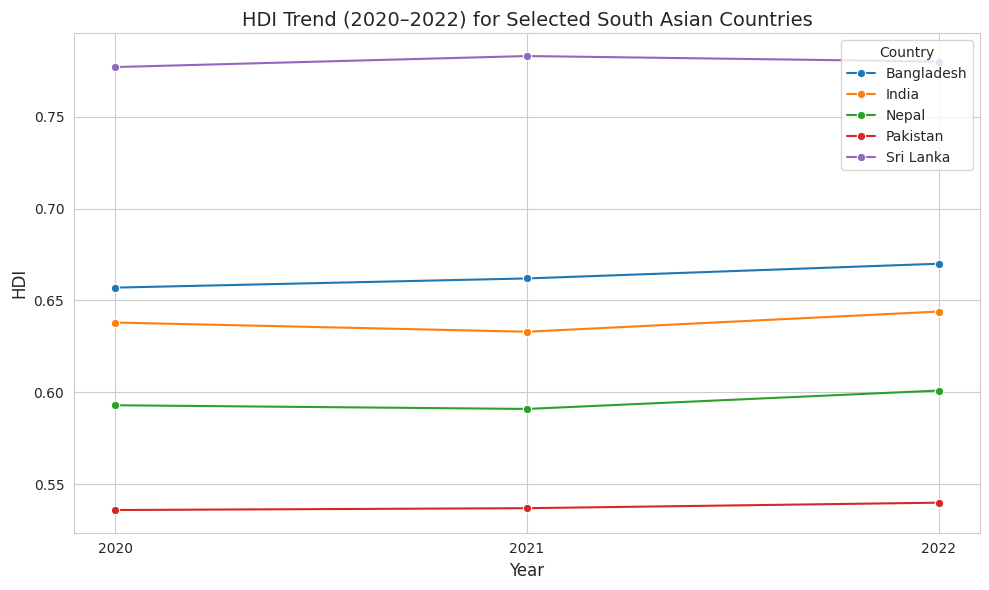

Figure 1: HDI trends from 2020 to 2022 for India, Nepal, Bangladesh, Pakistan, and Sri Lanka.
      The chart shows human development progression differences across these countries over three years.


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select five countries (South Asia example)
countries = ["India", "Nepal", "Bangladesh", "Pakistan", "Sri Lanka"]

# Filter the cleaned dataframe for these countries
df_line_chart = df_1B[df_1B['country'].isin(countries)].copy()

# Set Seaborn style
sns.set_style("whitegrid")

# Create the line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=df_line_chart, x='year', y='hdi', hue='country', marker='o')

# Add title and labels
plt.title("HDI Trend (2020–2022) for Selected South Asian Countries", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("HDI", fontsize=12)
plt.xticks([2020, 2021, 2022])
plt.legend(title="Country", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

# Caption for report or notebook
print("""Figure 1: HDI trends from 2020 to 2022 for India, Nepal, Bangladesh, Pakistan, and Sri Lanka.
      The chart shows human development progression differences across these countries over three years.""")


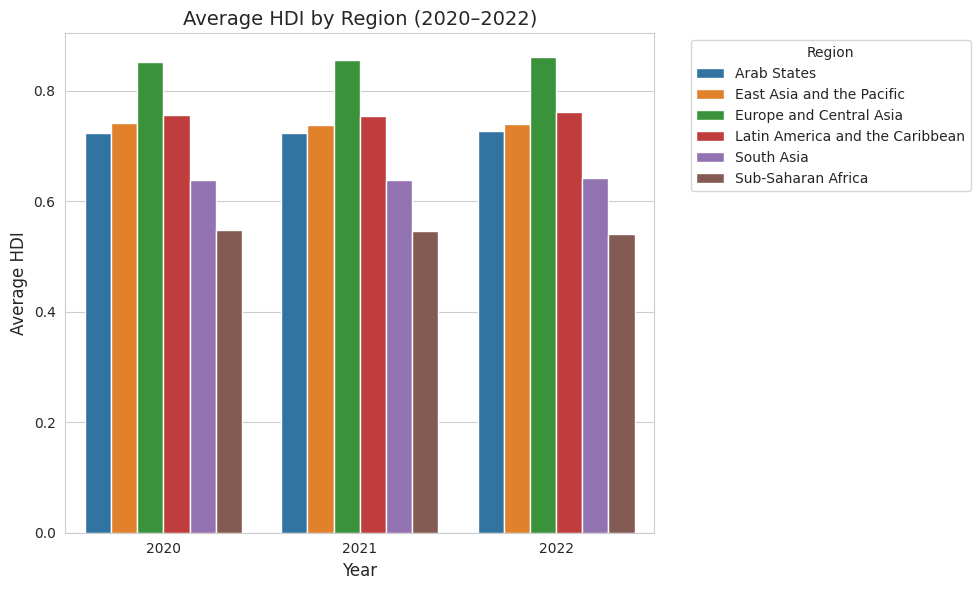

Bar Chart: Shows differences in average HDI across regions over 2020–2022. Some regions consistently have higher HDI than others.


In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Region and Year, compute mean HDI
hdi_avg_per_region = df_1B.groupby(['Region', 'year'])['hdi'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=hdi_avg_per_region, x='year', y='hdi', hue='Region')
plt.title("Average HDI by Region (2020–2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average HDI", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Interpretation
print("Bar Chart: Shows differences in average HDI across regions over 2020–2022. Some regions consistently have higher HDI than others.")


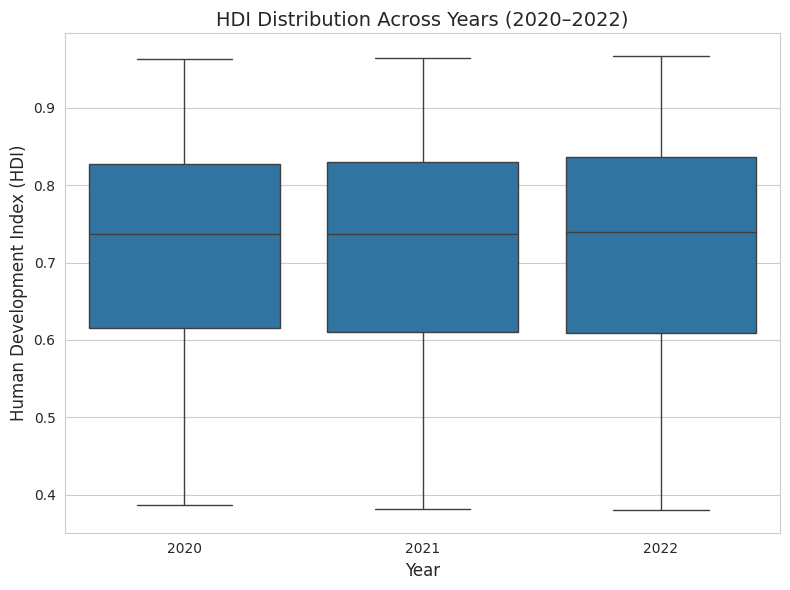

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset for years 2020, 2021, and 2022
df_box_plt = df_1B[df_1B['year'].isin([2020, 2021, 2022])].copy()

# Set seaborn style
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(8,6))
sns.boxplot(data=df_box_plt, x='year', y='hdi')

# Add title and labels
plt.title("HDI Distribution Across Years (2020–2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Human Development Index (HDI)", fontsize=12)

plt.tight_layout()
plt.show()


In [104]:
#from the box plot above
#All three years have very similar medians (around 0.74).
#The boxes (Q1 to Q3) for all three years are almost the same width (~0.61 to 0.83).
#This means the middle 50% of countries have similar HDI variability across all years.
#The minimum HDI is just below 0.4, and the maximum is above 0.9 for all years.
#So the overall range of HDI values hasn’t changed much either.

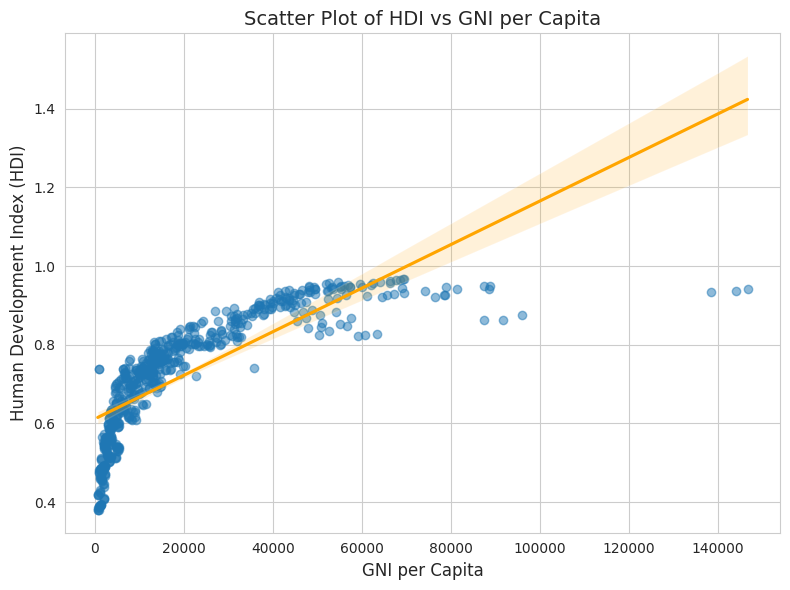

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

gni_column = 'gross_inc_percap'

if gni_column in df_1B.columns:

    plt.figure(figsize=(8,6))
    sns.regplot(
        data=df_1B,
        x=gni_column,
        y='hdi',
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'orange'}
    )

    plt.title("Scatter Plot of HDI vs GNI per Capita", fontsize=14)
    plt.xlabel("GNI per Capita", fontsize=12)
    plt.ylabel("Human Development Index (HDI)", fontsize=12)

    plt.tight_layout()
    plt.show()

else:
    print("GNI per Capita variable not available in the dataset.")


-------------------------------------------

----------------------------------------

**Problem 2: Advanced HDI Exploration**

------------------------------------------------------------------------------------------

In [107]:
#Define the list of South Asian countries:
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# new metric called Composite Score using the formula:
df_south_asia = df[df['country'].isin(south_asia_countries)].copy()

#formula:: Composite Score
# (0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index)
df_south_asia['Composite_Score'] = (
    0.30 * df_south_asia['life_expectancy'] +
    0.30 * df_south_asia['gross_inc_percap']
)



df_south_asia.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Composite_Score
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809,948.491234
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264,859.190321
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421,756.683396
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022,532.345729
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948,376.051646


In [108]:
#saving filtered df in  HDI _SouthAsia.csv  contains south asian countries
# new metric called Composite Score  created adn then  saved the file.
filename = "2548382_Ritesh_Khatri_HDI_SouthAsia.csv"

try:
    # Try to open the file for reading
    with open(filename, 'r'):
        print(f"{filename} already exists. Skipping save.")
except FileNotFoundError:
    # If file does not exist, save it
    try:
        df_south_asia.to_csv(filename, index=False)
        print(f"{filename} saved successfully.")
    except Exception as e:
        print(f"Error saving {filename}: {e}")

2548382_Ritesh_Khatri_HDI_SouthAsia.csv saved successfully.


In [109]:
s_Asia_df= pd.read_csv("/content/2548382_Ritesh_Khatri_HDI_SouthAsia.csv")
s_Asia_df.head()

# Rank by Composite Score (descending)

composite_rank_decending = s_Asia_df.sort_values(by='Composite_Score',ascending=False)

# View ranking
composite_rank_decending[['country', 'Composite_Score', 'hdi']].head()



,country,Composite_Score,hdi
164,Maldives,5678.289357,0.762
161,Maldives,5628.012408,0.753
160,Maldives,5440.721295,0.747
159,Maldives,5266.375503,0.740
158,Maldives,5097.397866,0.734


In [110]:
top_5_countries = composite_rank_decending.groupby('country', as_index=False)['Composite_Score'].mean().sort_values('Composite_Score', ascending=False).head(5)
top_5_countries.head(10)


,country,Composite_Score
4,Maldives,4154.252676
7,Sri Lanka,2502.612949
2,Bhutan,1878.321569
6,Pakistan,1184.282350
3,India,1151.101140


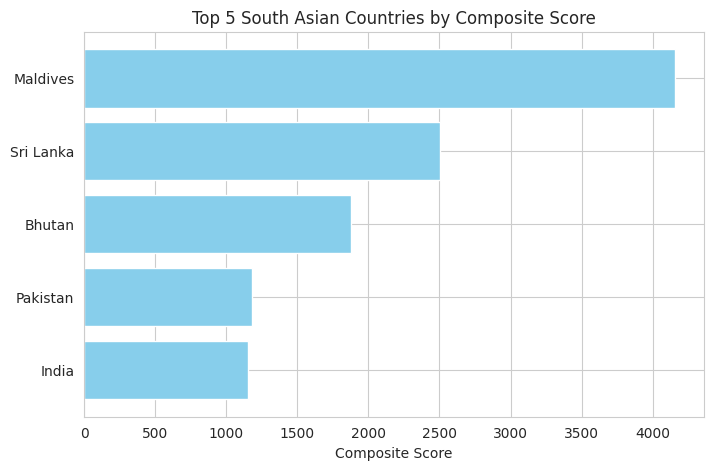

In [111]:
import matplotlib.pyplot as plt

# Horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(top_5_countries['country'], top_5_countries['Composite_Score'], color='skyblue')
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()  # Optional: highest score on top
plt.show()


In [112]:
#Outlier Detection:
def detect_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (col < lower) | (col > upper)

# Detect outliers
s_Asia_df['HDI_outlier'] = detect_outliers(s_Asia_df['hdi'])
s_Asia_df['GNI_outlier'] = detect_outliers(s_Asia_df['gross_inc_percap'])


# Show rows where HDI or GNI per capita is an outlier
outliers_hdi = s_Asia_df[s_Asia_df['HDI_outlier'] == True][['country', 'year', 'hdi']]
outliers_gni = s_Asia_df[s_Asia_df['GNI_outlier'] == True][['country', 'year', 'gross_inc_percap']]

print("HDI Outliers:")
print(outliers_hdi)

print("\nGNI per Capita Outliers:")
print(outliers_gni)




HDI Outliers:
Empty DataFrame
Columns: [country, year, hdi]
Index: []

GNI per Capita Outliers:
       country  year  gross_inc_percap
145   Maldives  2003       14543.14634
146   Maldives  2004       15287.20714
148   Maldives  2006       16391.40757
149   Maldives  2007       14162.42816
150   Maldives  2008       15423.81910
151   Maldives  2009       14050.92438
152   Maldives  2010       14363.23615
153   Maldives  2011       15300.31364
154   Maldives  2012       15355.44089
155   Maldives  2013       15648.36655
156   Maldives  2014       16410.16419
157   Maldives  2015       16414.93039
158   Maldives  2016       16911.45422
159   Maldives  2017       17474.64201
160   Maldives  2018       18055.72465
161   Maldives  2019       18679.92536
163   Maldives  2021       16857.60546
164   Maldives  2022       18846.79219
259  Sri Lanka  2018       13405.80369


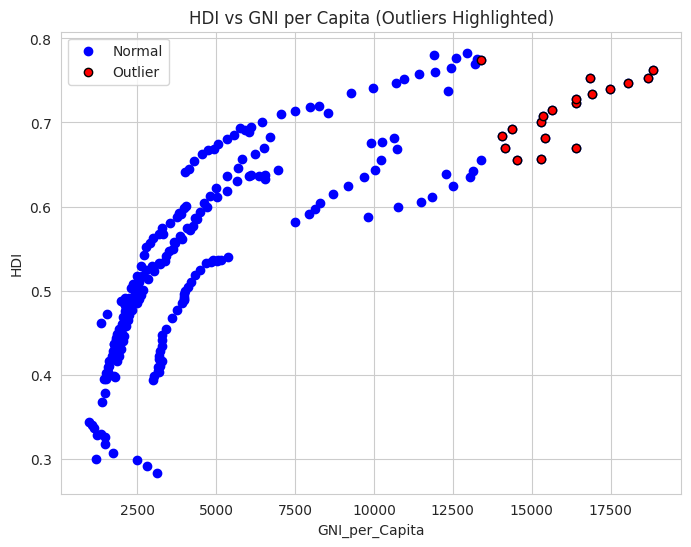

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(s_Asia_df['gross_inc_percap'], s_Asia_df['hdi'],
            c='blue', label='Normal')

# Highlight outliers in red
outliers = s_Asia_df[s_Asia_df['HDI_outlier'] | s_Asia_df['GNI_outlier']]
plt.scatter(outliers['gross_inc_percap'], outliers['hdi'],
            c='red', label='Outlier', edgecolors='black')

plt.xlabel('GNI_per_Capita')
plt.ylabel('HDI')
plt.title('HDI vs GNI per Capita (Outliers Highlighted)')
plt.legend()
plt.show()


In [114]:
"""Select two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life expectancy"})
• Compute Pearson correlation of each metric with HDI"""

s_Asia_df[['gender_development', 'life_expectancy', 'hdi']].corr()['hdi']
#correlations------>

,hdi
gender_development,0.865621
life_expectancy,0.958761
hdi,1.000000


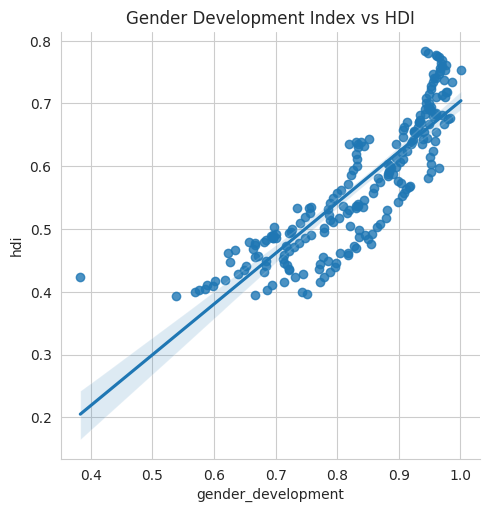

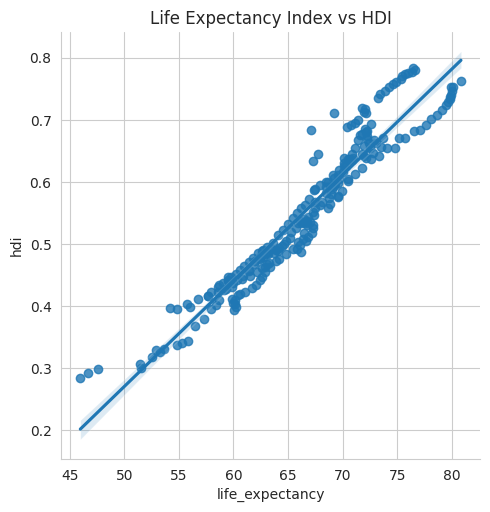

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gender Development vs HDI
sns.lmplot(x='gender_development', y='hdi', data=df_south_asia)
plt.title("Gender Development Index vs HDI")
plt.show()

# Life Expectancy vs HDI
sns.lmplot(x='life_expectancy', y='hdi', data=df_south_asia)
plt.title("Life Expectancy Index vs HDI")
plt.show()


-----------------------------------------------------------------------------------------------------------------

**4. Problem 3: Comparative Regional Analysis**

---------------------------------------------------------------------------------------------

In [116]:
#Create Middle East Subset:
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east_countries = [
    "Bahrain", "Iran (Islamic Republic of)", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine, State of", "Qatar",
    "Saudi Arabia", "Syrian Arab Republic",
    "United Arab Emirates", "Yemen"
]



In [117]:
#Save these subsets as HDI SouthAsia 2020 2022
df_south_asia_2020_2022 = df_1B[df_1B['country'].isin(south_asia_countries)].copy()
df_south_asia_2020_2022

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Region
0,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,...,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554,South Asia
1,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,...,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351,South Asia
2,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,South Asia
39,460,BGD,Bangladesh,2020,0.657,71.968,167.420951,0.619431,0.682912,73.957,...,0.502,43.659868,50.507937,20.916905,79.083095,38.74,81.27,0.559159,4.5993,South Asia
40,461,BGD,Bangladesh,2021,0.662,72.381,169.356251,0.624949,0.687950,74.267,...,0.500,43.659868,50.507937,20.857143,79.142857,39.15,81.39,0.583153,4.6834,South Asia
41,462,BGD,Bangladesh,2022,0.670,73.698,171.186373,0.634605,0.694223,76.012,...,0.498,43.659868,50.507937,20.857143,79.142857,39.15,81.39,0.583153,4.6457,South Asia
57,658,BTN,Bhutan,2020,0.675,71.609,0.772506,0.667533,0.681309,73.536,...,0.326,26.681771,34.252853,15.277778,84.722222,63.52,72.51,1.190619,27.7915,South Asia
58,659,BTN,Bhutan,2021,0.677,71.815,0.777486,0.671331,0.682830,73.773,...,0.318,26.681771,34.252853,16.666667,83.333333,65.30,73.10,1.366198,24.2373,South Asia
59,660,BTN,Bhutan,2022,0.681,72.229,0.782455,0.669680,0.690410,74.152,...,0.334,26.681771,34.252853,15.714286,84.285714,53.48,73.45,1.366198,24.7398,South Asia
231,2572,IND,India,2020,0.638,70.150,1396.387127,0.569477,0.679697,71.824,...,0.453,40.073738,58.762402,13.392857,86.607143,26.17,74.25,1.734155,4.4451,South Asia


In [118]:
#Save these subsets as  HDI MiddleEast 2020 2022.csv
df_middle_east_2020_2022 = df_1B[df_1B['country'].isin(middle_east_countries)].copy()
df_middle_east_2020_2022

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Region
36,427,BHR,Bahrain,2020,0.884,79.174,1.477469,0.863605,0.897164,80.433,...,0.197,79.903572,83.080162,18.750000,81.250000,41.85,85.54,25.310785,23.5735,Arab States
37,428,BHR,Bahrain,2021,0.884,78.760,1.463266,0.842563,0.901353,80.018,...,0.192,79.903572,83.080162,18.750000,81.250000,42.43,85.77,26.053039,19.6832,Arab States
38,429,BHR,Bahrain,2022,0.888,79.246,1.472233,0.847334,0.904299,80.497,...,0.181,79.903572,83.080162,22.500000,77.500000,42.43,85.77,26.053039,20.3063,Arab States
237,2638,IRN,Iran (Islamic Republic of),2020,0.779,74.832,87.290193,0.708295,0.803982,77.817,...,0.485,73.064987,77.326285,5.594406,94.405594,13.88,68.05,7.778734,8.7382,Arab States
238,2639,IRN,Iran (Islamic Republic of),2021,0.776,73.875,87.923433,0.703968,0.801977,76.808,...,0.489,73.064987,77.326285,5.594406,94.405594,13.25,67.94,7.825883,7.6777,Arab States
239,2640,IRN,Iran (Islamic Republic of),2022,0.780,74.556,88.550570,0.709666,0.806166,77.453,...,0.484,73.064987,77.326285,5.594406,94.405594,13.58,67.54,7.825883,8.9111,Arab States
240,2671,IRQ,Iraq,2020,0.661,69.123,42.556984,0.557776,0.711412,71.185,...,0.569,25.299578,40.352954,26.443769,73.556231,10.87,69.29,3.755912,5.8825,Arab States
241,2672,IRQ,Iraq,2021,0.667,70.378,43.533592,0.560132,0.717141,72.422,...,0.563,25.299578,40.352954,28.875380,71.124620,10.77,68.24,3.872580,5.0368,Arab States
242,2673,IRQ,Iraq,2022,0.673,71.336,44.496122,0.568530,0.723618,73.362,...,0.562,25.299578,40.352954,28.875380,71.124620,10.77,68.24,3.872580,5.2271,Arab States
246,2737,ISR,Israel,2020,0.906,82.360,8.757490,0.901975,0.909249,84.470,...,0.085,92.494341,94.506444,27.500000,72.500000,59.44,67.60,6.359985,28.0577,Arab States


In [119]:
#Saving the files:
df_south_asia_2020_2022.to_csv("2548382_Ritesh_Khatri_HDI_SouthAsia_2020_2022.csv", index=False)
df_middle_east_2020_2022.to_csv("2548382_Ritesh_Khatri_HDI_MiddleEast_2020_2022.csv", index=False)


In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_sa = pd.read_csv("/content/2548382_Ritesh_Khatri_HDI_SouthAsia_2020_2022.csv")
df_me = pd.read_csv("/content/2548382_Ritesh_Khatri_HDI_MiddleEast_2020_2022.csv")

sa_mean = df_sa['hdi'].mean()
sa_std = df_sa['hdi'].std()

me_mean = df_me['hdi'].mean()
me_std = df_me['hdi'].std()

print("South Asia - Mean HDI:", sa_mean)
print("South Asia - Std HDI:", sa_std)

print("Middle East - Mean HDI:", me_mean)
print("Middle East - Std HDI:", me_std)


South Asia - Mean HDI: 0.6395833333333333
South Asia - Std HDI: 0.09827331747496995
Middle East - Mean HDI: 0.766452380952381
Middle East - Std HDI: 0.13910010474666892


In [122]:
#Higher mean HDI = better average performance
better_region = "Middle East" if me_mean > sa_mean else "South Asia"
print("Region with better average HDI:", better_region)


Region with better average HDI: Middle East


In [123]:
#Identify the top 3 and bottom 3 countries in each region based on HDI.

sa_rank = df_sa.groupby('country', as_index=False)['hdi'].mean()

sa_top3 = sa_rank.sort_values('hdi', ascending=False).head(3)
sa_bottom3 = sa_rank.sort_values('hdi', ascending=True).head(3)

print("South Asia - Top 3 Countries by HDI")
print(sa_top3)

print("\nSouth Asia - Bottom 3 Countries by HDI")
print(sa_bottom3)
me_rank = df_me.groupby('country', as_index=False)['hdi'].mean()

me_top3 = me_rank.sort_values('hdi', ascending=False).head(3)
me_bottom3 = me_rank.sort_values('hdi', ascending=True).head(3)

print("Middle East - Top 3 Countries by HDI")
print(me_top3)

print("\nMiddle East - Bottom 3 Countries by HDI")
print(me_bottom3)


South Asia - Top 3 Countries by HDI
     country       hdi
7  Sri Lanka  0.780000
4   Maldives  0.750667
2     Bhutan  0.677667

South Asia - Bottom 3 Countries by HDI
       country       hdi
0  Afghanistan  0.474333
6     Pakistan  0.537667
5        Nepal  0.595000
Middle East - Top 3 Countries by HDI
                 country       hdi
12  United Arab Emirates  0.932667
3                 Israel  0.910667
0                Bahrain  0.885333

Middle East - Bottom 3 Countries by HDI
                 country       hdi
13                 Yemen  0.426333
11  Syrian Arab Republic  0.558667
2                   Iraq  0.667000


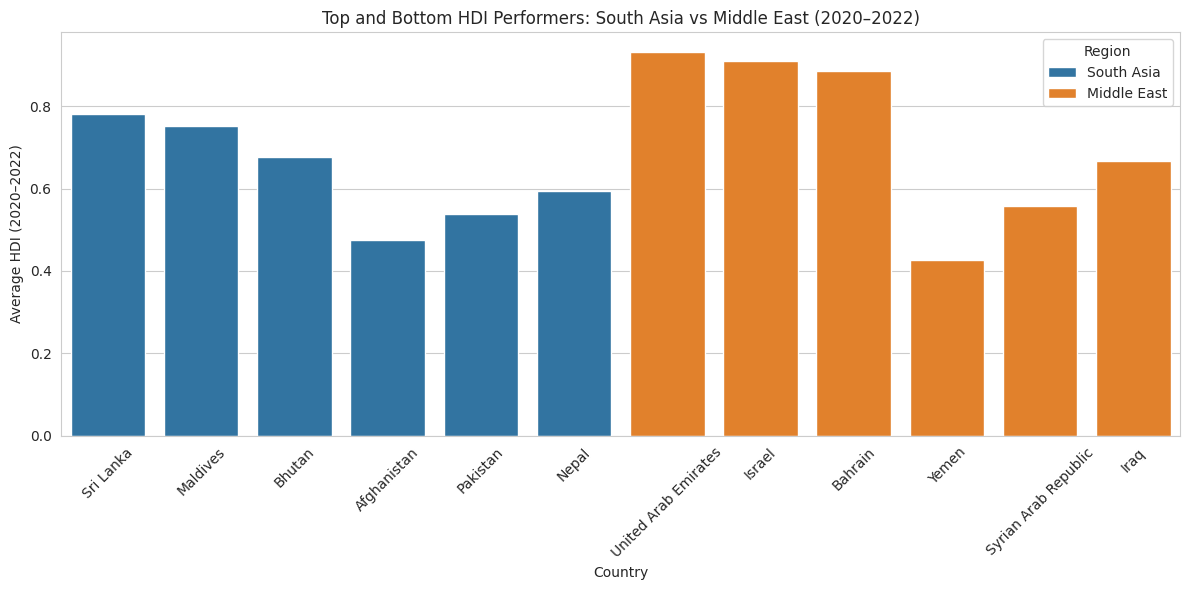

In [124]:
#Create a bar chart comparing these top and bottom performers across the two regions.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add region labels
sa_top3['region'] = 'South Asia'
sa_bottom3['region'] = 'South Asia'
me_top3['region'] = 'Middle East'
me_bottom3['region'] = 'Middle East'

# Add performer type
sa_top3['type'] = 'Top 3'
sa_bottom3['type'] = 'Bottom 3'
me_top3['type'] = 'Top 3'
me_bottom3['type'] = 'Bottom 3'

# Combine all
plot_df = pd.concat([sa_top3, sa_bottom3, me_top3, me_bottom3])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=plot_df, x='country', y='hdi', hue='region')

plt.title("Top and Bottom HDI Performers: South Asia vs Middle East (2020–2022)")
plt.xlabel("Country")
plt.ylabel("Average HDI (2020–2022)")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()
plt.show()


In [125]:
sa_top3

,country,hdi,region,type
7,Sri Lanka,0.780000,South Asia,Top 3
4,Maldives,0.750667,South Asia,Top 3
2,Bhutan,0.677667,South Asia,Top 3


Compare the following metrics across regions using grouped bar charts:
– Gender Development Index {"gender development"}
– Life Expectancy Index {"life expectancy"}
– GNI per Capita Index {"gross inc percap"}
• Identify which metric shows the greatest disparity between regions.


In [126]:
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

# Compute mean for each metric by region
sa_means = df_sa[metrics].mean()
me_means = df_me[metrics].mean()

comparison_df = pd.DataFrame({
    'Metric': metrics,
    'South Asia': sa_means.values,
    'Middle East': me_means.values
})
comparison_df


,Metric,South Asia,Middle East
0,gender_development,0.881458,0.887452
1,life_expectancy,70.970083,75.340857
2,gross_inc_percap,7766.509931,31432.891216


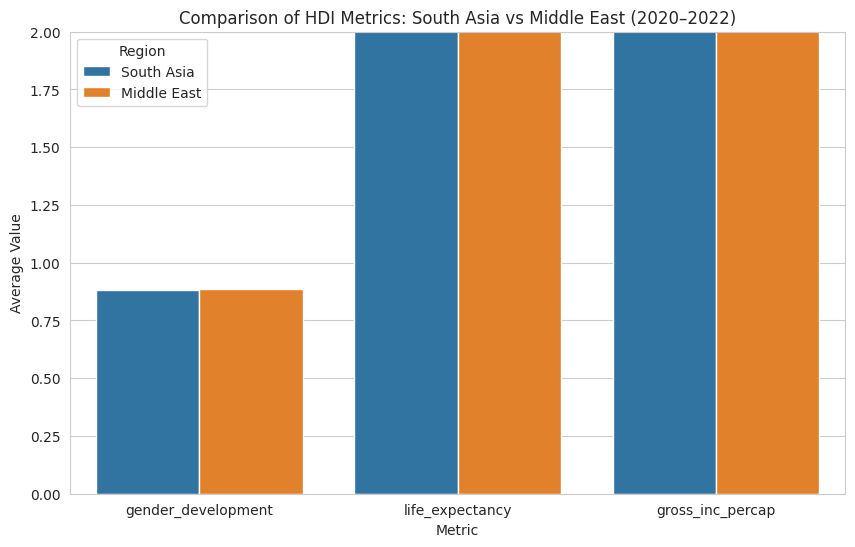

In [127]:
comparison_df_melted = comparison_df.melt(id_vars='Metric', var_name='Region', value_name='Value')

plt.figure(figsize=(10,6))
sns.barplot(data=comparison_df_melted, x='Metric', y='Value', hue='Region')
plt.title("Comparison of HDI Metrics: South Asia vs Middle East (2020–2022)")
plt.ylabel("Average Value")
plt.ylim(0,2)  # since all metrics are normalized indices
plt.show()


HDI Disparity:
• Compute the range (max – min) of HDI for each region.
• Compute the coefficient of variation (CV = std/mean) for HDI.
Identify which region exhibits more variation in HDI

In [128]:
# HDI Range
sa_range = df_sa['hdi'].max() - df_sa['hdi'].min()
me_range = df_me['hdi'].max() - df_me['hdi'].min()

# Coefficient of Variation (CV)
sa_cv = df_sa['hdi'].std() / df_sa['hdi'].mean()
me_cv = df_me['hdi'].std() / df_me['hdi'].mean()

print("South Asia - HDI Range:", sa_range)
print("South Asia - HDI CV:", sa_cv)

print("Middle East - HDI Range:", me_range)
print("Middle East - HDI CV:", me_cv)

# Determine which region has more variation
if sa_cv > me_cv:
    print("South Asia exhibits more relative variation in HDI.")
else:
    print("Middle East exhibits more relative variation in HDI.")


South Asia - HDI Range: 0.321
South Asia - HDI CV: 0.1536520924690084
Middle East - HDI Range: 0.5130000000000001
Middle East - HDI CV: 0.18148564503619316
Middle East exhibits more relative variation in HDI.


Correlation Analysis:
• For each region, compute correlations of HDI with:
– Gender Development Index
– Life Expectancy Index
• Create scatter plots with trendlines for each correlation.
• Interpret the strength and direction of these relationships.


South Asia Correlations with HDI:
gender_development    0.874218
life_expectancy       0.938764
hdi                   1.000000
Name: hdi, dtype: float64

Middle East Correlations with HDI:
gender_development    0.902494
life_expectancy       0.910720
hdi                   1.000000
Name: hdi, dtype: float64


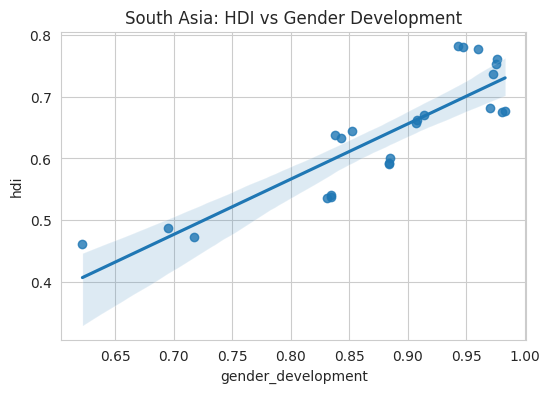

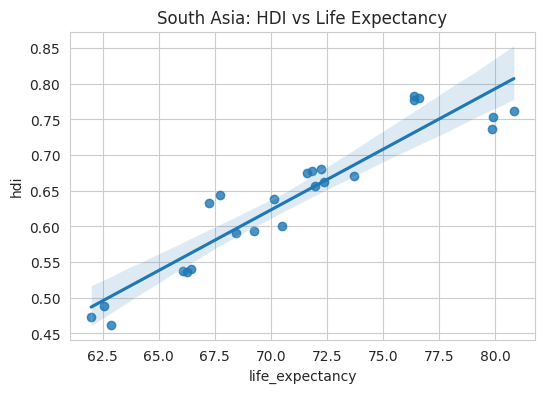

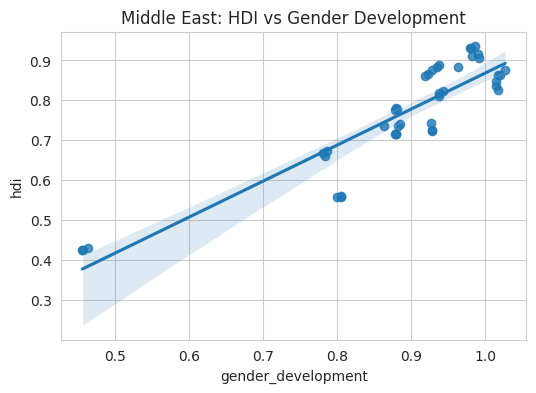

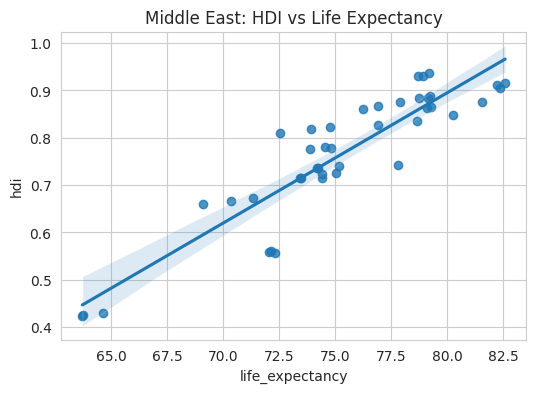

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns of interest
metrics = ['gender_development', 'life_expectancy']

# South Asia correlation
print("South Asia Correlations with HDI:")
print(df_sa[metrics + ['hdi']].corr()['hdi'])

# Middle East correlation
print("\nMiddle East Correlations with HDI:")
print(df_me[metrics + ['hdi']].corr()['hdi'])

# Scatter plots with trendlines for South Asia
for metric in metrics:
    plt.figure(figsize=(6,4))
    sns.regplot(data=df_sa, x=metric, y='hdi')
    plt.title(f"South Asia: HDI vs {metric.replace('_', ' ').title()}")
    plt.show()

# Scatter plots with trendlines for Middle East
for metric in metrics:
    plt.figure(figsize=(6,4))
    sns.regplot(data=df_me, x=metric, y='hdi')
    plt.title(f"Middle East: HDI vs {metric.replace('_', ' ').title()}")
    plt.show()


Outlier Detection:
• Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using
the 1.5 × IQR rule.
• Create scatter plots highlighting outliers in a different color.
• Discuss the significance of these outliers.

In [130]:
def detect_outliers_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (col < lower) | (col > upper)


In [131]:
df_sa['hdi_outlier'] = detect_outliers_iqr(df_sa['hdi'])
df_sa['gni_outlier'] = detect_outliers_iqr(df_sa['gross_inc_percap'])


In [132]:
df_me['hdi_outlier'] = detect_outliers_iqr(df_me['hdi'])
df_me['gni_outlier'] = detect_outliers_iqr(df_me['gross_inc_percap'])


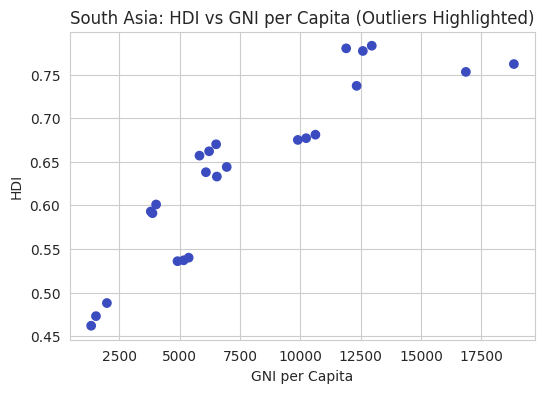

In [133]:
plt.figure(figsize=(6,4))
plt.scatter(df_sa['gross_inc_percap'], df_sa['hdi'],
            c=df_sa['hdi_outlier'] | df_sa['gni_outlier'],
            cmap='coolwarm')

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs GNI per Capita (Outliers Highlighted)")
plt.show()


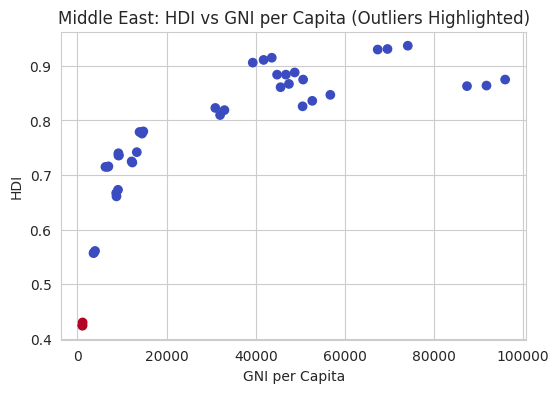

In [134]:
plt.figure(figsize=(6,4))
plt.scatter(df_me['gross_inc_percap'], df_me['hdi'],
            c=df_me['hdi_outlier'] | df_me['gni_outlier'],
            cmap='coolwarm')

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs GNI per Capita (Outliers Highlighted)")
plt.show()


In [135]:
sa_outliers = df_sa[df_sa['hdi_outlier'] | df_sa['gni_outlier']][['country', 'hdi', 'gross_inc_percap']]
me_outliers = df_me[df_me['hdi_outlier'] | df_me['gni_outlier']][['country', 'hdi', 'gross_inc_percap']]

print("South Asia Outliers:")
print(sa_outliers)

print("\nMiddle East Outliers:")
print(me_outliers)


South Asia Outliers:
Empty DataFrame
Columns: [country, hdi, gross_inc_percap]
Index: []

Middle East Outliers:
   country    hdi  gross_inc_percap
39   Yemen  0.430       1152.015672
40   Yemen  0.425       1112.162989
41   Yemen  0.424       1105.763435
